# preparation

In [ ]:
import pyhere
root = pyhere.here().resolve()

print(root)

/work/Walmart_analysis


In [ ]:
import kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data processing

## data extraccion

In [ ]:
!kaggle datasets download -d aslanahmedov/walmart-sales-forecast -p {root.joinpath('data')} --unzip

  0%|                                               | 0.00/3.36M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 3.36M/3.36M [00:00<00:00, 144MB/s]


In [ ]:
features = pd.read_csv(root.joinpath('data','features.csv'))
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [ ]:
stores = pd.read_csv(root.joinpath('data','stores.csv'))
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [ ]:
train = pd.read_csv(root.joinpath('data','train.csv'))
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [ ]:
test = pd.read_csv(root.joinpath('data','test.csv'))
test.head(2)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False


## data cleaning

### nan filing

In [ ]:
stores['Store'] = stores['Store'].astype('object')
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     object
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [ ]:
features['Store'] = features['Store'].astype('object')
features['Date'] = features['Date'].apply(pd.to_datetime)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   object        
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), object(1)
memory usage: 712.0+ KB


In [ ]:
train['Date'] = train['Date'].apply(pd.to_datetime)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
features_filled_all = features.copy(deep=True)

features_filled_all[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = features_filled_all[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

for column in ['CPI','Unemployment']:
    mean_value = features_filled_all[column].mean()
    features_filled_all[column] = features_filled_all[column].fillna(mean_value)
    
features_filled_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   object        
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), object(1)
memory usage: 712.0+ KB


In [ ]:
features_filled = features.copy(deep=True)

for column in ['CPI','Unemployment']:
    mean_value = features_filled[column].mean()
    features_filled[column] = features_filled[column].fillna(mean_value)

features_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   object        
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), object(1)
memory usage: 712.0+ KB


In [ ]:
test.Date = test.Date.astype('datetime64[ns]')
features_filled.Date = features_filled.Date.astype('datetime64[ns]')

train_merge = train.drop(columns=['IsHoliday','Dept']).groupby(['Store','Date']).sum().reset_index()

In [ ]:
featuresFill_stores_merge = pd.merge(features_filled,stores,on='Store')
df_filled = pd.merge(featuresFill_stores_merge,train_merge,on=['Store','Date'],how='right')

df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   MarkDown1     2280 non-null   float64       
 5   MarkDown2     1637 non-null   float64       
 6   MarkDown3     2046 non-null   float64       
 7   MarkDown4     1965 non-null   float64       
 8   MarkDown5     2295 non-null   float64       
 9   CPI           6435 non-null   float64       
 10  Unemployment  6435 non-null   float64       
 11  IsHoliday     6435 non-null   bool          
 12  Type          6435 non-null   object        
 13  Size          6435 non-null   int64         
 14  Weekly_Sales  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64

In [ ]:
featuresFill_stores_merge = pd.merge(features_filled_all,stores,on='Store')
df_filled_all = pd.merge(featuresFill_stores_merge,train_merge,on=['Store','Date'],how='right')

df_filled_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   MarkDown1     6435 non-null   float64       
 5   MarkDown2     6435 non-null   float64       
 6   MarkDown3     6435 non-null   float64       
 7   MarkDown4     6435 non-null   float64       
 8   MarkDown5     6435 non-null   float64       
 9   CPI           6435 non-null   float64       
 10  Unemployment  6435 non-null   float64       
 11  IsHoliday     6435 non-null   bool          
 12  Type          6435 non-null   object        
 13  Size          6435 non-null   int64         
 14  Weekly_Sales  6435 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64

In [ ]:
features_stores_merge = pd.merge(features,stores,on='Store')
df_raw = pd.merge(features_stores_merge,train_merge,how='outer',on=['Store','Date'])
df_raw.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1643690.90
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,1641957.44


¿is the nan managing correct?
-

- in the markdowns when there is a nan value it means that there is no descount so its makes sence to filled with 0
- in the other features the distribution fits better when they are filled with the avarage value

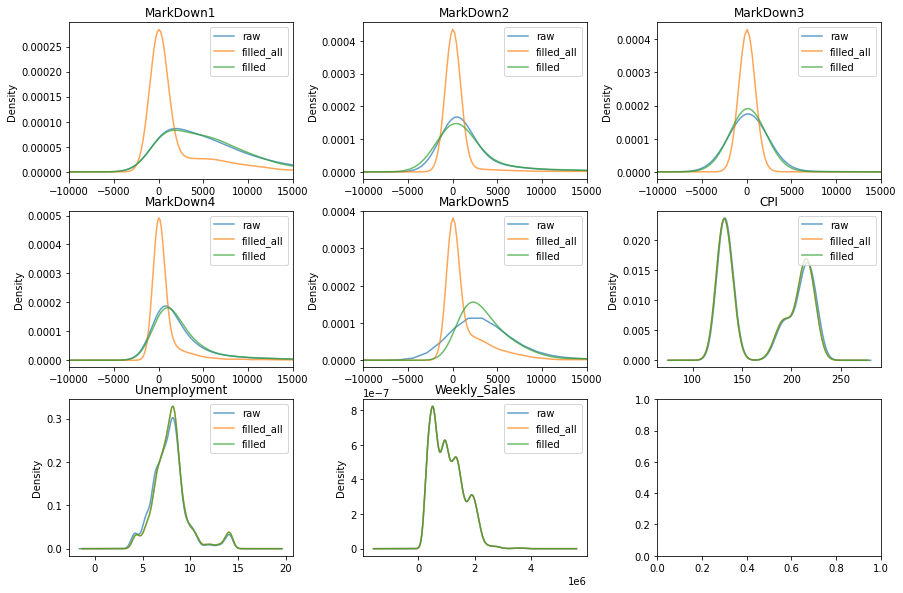

In [ ]:
fig,axs = plt.subplots(3,3,figsize=(12,8))
plt.tight_layout(w_pad=4)
columns = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Weekly_Sales']

for feature, ax in zip(columns,axs.flatten()):    
    df_raw[feature].plot(kind='kde',label=f'raw',ax=ax,alpha=0.7)
    df_filled_all[feature].plot(kind='kde',label=f'filled_all',ax=ax,alpha=0.7)
    df_filled[feature].plot(kind='kde',label=f'filled',ax=ax,alpha=0.7)

    if feature.startswith('MarkDown'):
        ax.set_xlim(-10000,15000)
    ax.set_title(feature)
    ax.legend(loc="upper right")

### outlier filter

/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

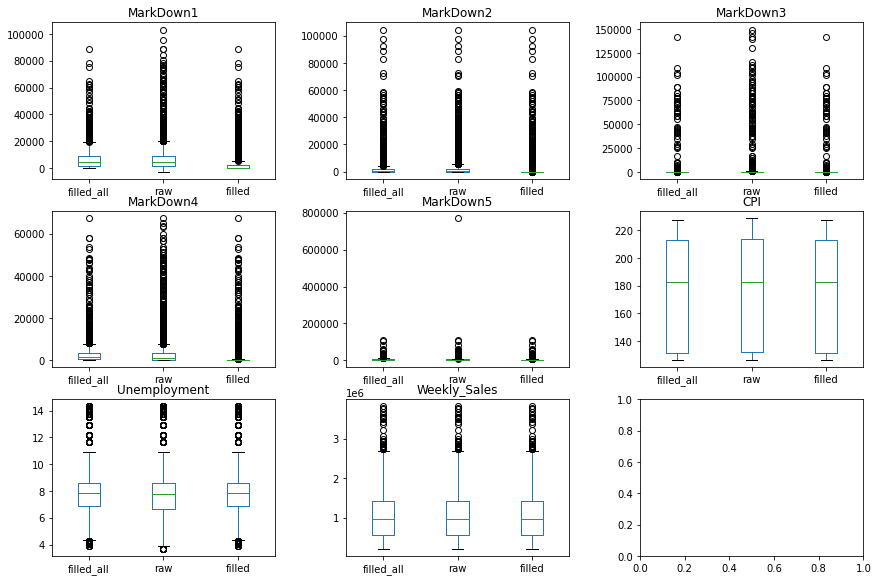

In [ ]:
fig,axs = plt.subplots(3,3,figsize=(12,8),sharey=False)
plt.tight_layout(w_pad=4)
column = set(df_filled.columns)-set(['Date','type'])

for feature, ax in zip(columns,axs.flatten()): 
    data = pd.concat([df_filled[feature],df_raw[feature],df_filled_all[feature]],axis=1)   
    data.columns = ['filled_all','raw','filled']

    data.plot(kind='box',ax=ax)
    ax.set_title(feature)

In [1]:
def remove_aoutliers_IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3-Q1

    min_value = Q1-1.5*IQR
    max_value = Q3+1.5*IQR

    series_clean_index = (series > min_value) & (series < max_value)
    return series[series_clean_index]

/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/root/venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

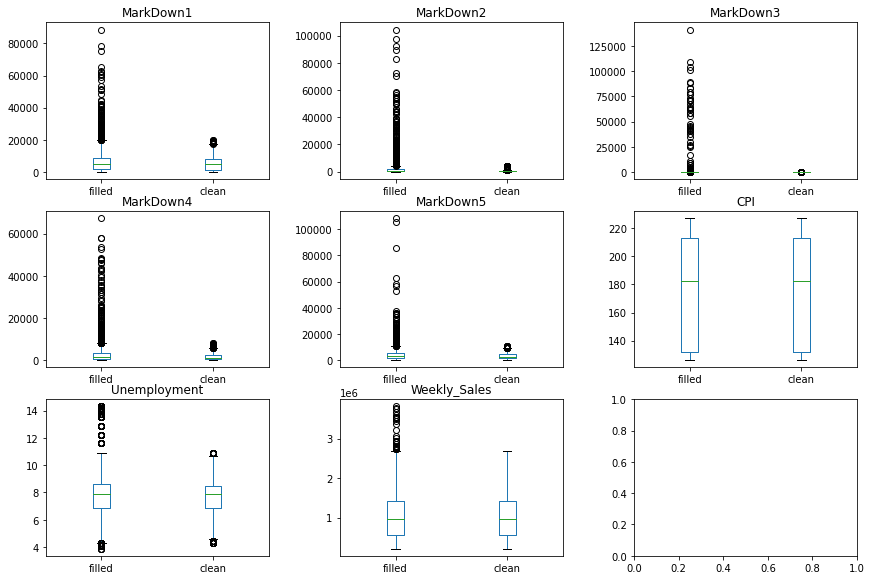

In [ ]:
df_clean = df_filled.copy()
df_clean[columns] = df_filled[columns].apply(remove_aoutliers_IQR)

fig,axs = plt.subplots(3,3,figsize=(12,8),sharey=False)
plt.tight_layout(w_pad=4)
column = set(df_filled.columns)-set(['Date','type'])

for feature, ax in zip(columns,axs.flatten()): 
    data = pd.concat([df_filled[feature],df_clean[feature]],axis=1)   
    data.columns = ['filled','clean']

    data.plot(kind='box',label=f'filled',ax=ax)
    ax.set_title(feature)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   MarkDown1     2142 non-null   float64       
 5   MarkDown2     1368 non-null   float64       
 6   MarkDown3     1772 non-null   float64       
 7   MarkDown4     1777 non-null   float64       
 8   MarkDown5     2184 non-null   float64       
 9   CPI           6435 non-null   float64       
 10  Unemployment  5954 non-null   float64       
 11  IsHoliday     6435 non-null   bool          
 12  Type          6435 non-null   object        
 13  Size          6435 non-null   int64         
 14  Weekly_Sales  6401 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64

there is a lot of outliers so for the exploration it will be use a convination both datsets `df_clean` y `df_filled` para realizar analisis y predicciones

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=740c3fbb-6503-48b5-8790-fc69ebaa42e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>